In [1]:
import random
import os
import cv2
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import tensorflow.keras as keras 

# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle


In [2]:
data=pd.read_csv('C:\\Users\\Ketaki\\OneDrive\\Desktop\\ppl project\\data.csv')
df=pd.DataFrame(data)
print(df)

       pixel_0000  pixel_0001  pixel_0002  pixel_0003  pixel_0004  pixel_0005  \
0               0           0           0           0           0           0   
1               0           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
91995           0           0           0           0           0           0   
91996           0           0           0           0           0           0   
91997           0           0           0           0           0           0   
91998           0           0           0           0           0           0   
91999           0           0           0           0           0           0   

       pixel_0006  pixel_00

In [3]:
char_dict={'character_01_ka':'क', 'character_02_kha':'ख','character_03_ga':'ग','character_04_gha':'घ','character_05_kna':'ङ','character_06_cha':'च','character_07_chha':'छ','character_08_ja':'ज','character_09_jha':'झ','character_10_yna':'ञ','character_11_taamatar':'ट','character_12_thaa':'ठ','character_13_daa':'ड','character_14_dhaa':'ढ','character_15_adna':'ण','character_16_tabala':'त','character_17_tha':'थ','character_18_da':'द','character_19_dha':'ध','character_20_na':'न',
     'character_21_pa':'प','character_22_pha':'फ' ,'character_23_ba':'ब','character_24_bha':'भ','character_25_ma':'म','character_26_yaw':'य','character_27_ra':'र','character_28_la':'ल','character_29_waw':'व',
     'character_30_motosaw':'श', 'character_31_petchiryakha':'ष','character_32_patalosaw':'स','character_33_ha':'ह','character_34_chhya':'ळ','character_35_tra':'क्ष','character_36_gya':'ज्ञा ',
     'digit_0':'०','digit_1':'१' ,'digit_2':'२','digit_3':'३','digit_4':'४','digit_5':'५', 'digit_6':'६','digit_7':'७','digit_8':'८','digit_9':'९'}
df['character']=df['character'].map(char_dict)
print(df)



       pixel_0000  pixel_0001  pixel_0002  pixel_0003  pixel_0004  pixel_0005  \
0               0           0           0           0           0           0   
1               0           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
91995           0           0           0           0           0           0   
91996           0           0           0           0           0           0   
91997           0           0           0           0           0           0   
91998           0           0           0           0           0           0   
91999           0           0           0           0           0           0   

       pixel_0006  pixel_00

In [ ]:



X = data.values[:,:-1]/255.0
X = np.asarray(X).astype(np.float32)

Y = data["character"].values
print(Y)




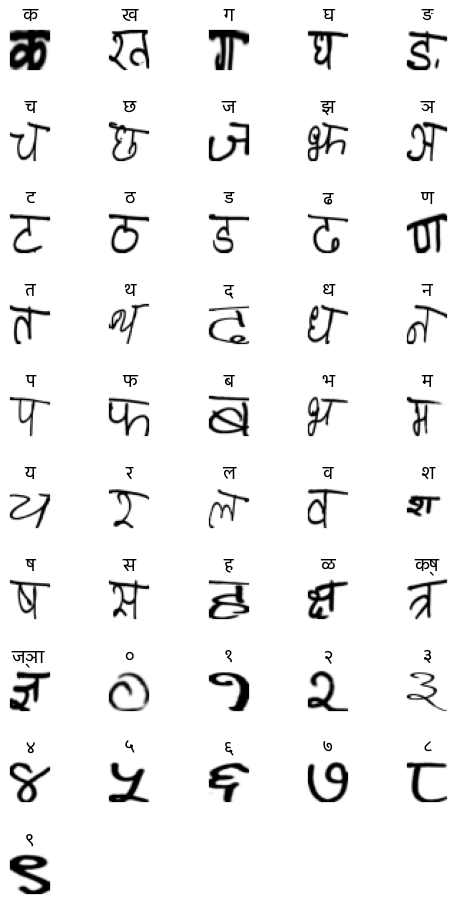

In [134]:
char_names = data.character.unique()  
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.font_manager import FontProperties


font_prop = FontProperties(fname= 'C:\\Users\\Ketaki\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Sarala-Regular.ttf', size=18)


for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
        

            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1],FontProperties=font_prop)

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()


In [135]:
n_classes=46
# Let's split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [136]:
img_height_rows = 32
img_width_cols = 32

In [137]:
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

x_train: (64400, 32, 32, 1)
x_test: (27600, 32, 32, 1)


In [138]:
cnn = Sequential()

In [139]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [140]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)


In [141]:
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [142]:
# Let's deactivate around 20% of neurons randomly for training
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

In [143]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [144]:
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform',name='dense11')
cnn.add(h_dense_1)

In [145]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)


In [129]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [130]:
print(cnn.summary())
print("dbvnf")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)         

In [20]:
history = cnn.fit(x_train, y_train,
                  epochs=10,
                  validation_data=(x_test, y_test))

Epoch 1/10
2013/2013 [==============================] - 143s 71ms/step - loss: 0.6965 - accuracy: 0.7957 - val_loss: 0.2304 - val_accuracy: 0.9290
Epoch 2/10
2013/2013 [==============================] - 144s 72ms/step - loss: 0.1927 - accuracy: 0.9404 - val_loss: 0.1389 - val_accuracy: 0.9579
Epoch 3/10
2013/2013 [==============================] - 144s 72ms/step - loss: 0.1244 - accuracy: 0.9613 - val_loss: 0.1183 - val_accuracy: 0.9660
Epoch 4/10
2013/2013 [==============================] - 145s 72ms/step - loss: 0.0949 - accuracy: 0.9704 - val_loss: 0.0953 - val_accuracy: 0.9722
Epoch 5/10
2013/2013 [==============================] - 146s 73ms/step - loss: 0.0762 - accuracy: 0.9753 - val_loss: 0.0940 - val_accuracy: 0.9740
Epoch 6/10
2013/2013 [==============================] - 146s 72ms/step - loss: 0.0614 - accuracy: 0.9806 - val_loss: 0.0818 - val_accuracy: 0.9774
Epoch 7/10
2013/2013 [==============================] - 142s 70ms/step - loss: 0.0544 - accuracy: 0.9828 - val_loss: 0

In [21]:
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 97.94%


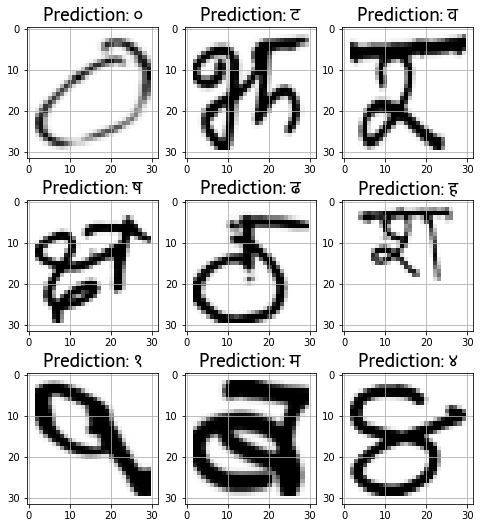

In [61]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
char_names = data.character.unique()  

font_prop = FontProperties(fname= 'C:\\Users\\Ketaki\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Sarala-Regular.ttf', size=18)

for i,ax in enumerate(axes):
    img = np.reshape(x_test[i], (32,32))
    ax.imshow(img, cmap="Greys")
    
    pred = char_names[np.argmax(y_test[i])]
    ax.set_title("Prediction: "+pred,FontProperties=font_prop)
    ax.grid()
    


र


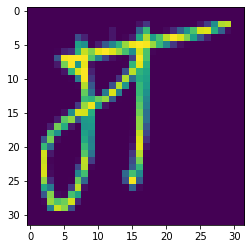

In [116]:
img = x_train[397].reshape([32,32])
plt.imshow(img)
pred = char_names[np.argmax(y_train[397])]
print(pred)


img_final: (1, 32, 32, 1)
Prediction: ज


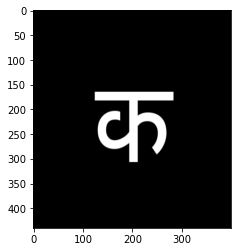

In [77]:
ont_prop = FontProperties(fname= 'C:\\Users\\Ketaki\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Sarala-Regular.ttf', size=18)
img = cv2.imread(r'C:\Users\Ketaki\OneDrive\Desktop\ppl project\testFiles\word1_0.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
img_data=np.array(img)
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (32,32))
img_final =np.reshape(img_final, (1,-1))
img_final=img_final.reshape(img_final.shape[0],*im_shape)
print("img_final:",img_final.shape)
plt.imshow(img_data)
img_pred =char_names[np.argmax(cnn.predict(img_final))]
print("Prediction:",img_pred)
img1=img_final.resize(1024,64)

img_final: (1, 32, 32, 1)
Prediction: ज


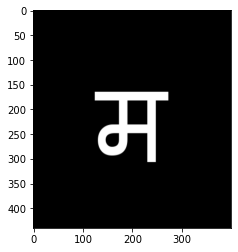

In [57]:
img = cv2.imread(r'C:\Users\Ketaki\OneDrive\Desktop\ppl project\testFiles\word1_1.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
img_data=np.array(img)
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (32,32))
img_final =np.reshape(img_final, (1,-1))
img_final=img_final.reshape(img_final.shape[0],*im_shape)
print("img_final:",img_final.shape)
plt.imshow(img_data)
img_pred =char_names[np.argmax(cnn.predict(img_final))]
print("Prediction:",img_pred)

img_final: (1, 32, 32, 1)
Prediction: प


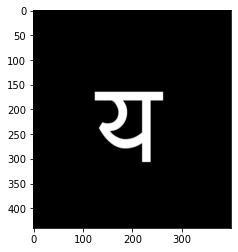

In [52]:
img = cv2.imread(r'C:\Users\Ketaki\OneDrive\Desktop\ppl project\testFiles\word2_0.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
img_data=np.array(img)
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (32,32))
img_final =np.reshape(img_final, (1,-1))
img_final=img_final.reshape(img_final.shape[0],*im_shape)
print("img_final:",img_final.shape)
plt.imshow(img_data)
img_pred =char_names[np.argmax(cnn.predict(img_final))]
print("Prediction:",img_pred)

img_final: (1, 32, 32, 1)
Prediction: म


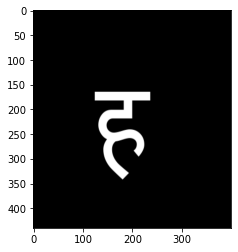

In [55]:
img = cv2.imread(r'C:\Users\Ketaki\OneDrive\Desktop\ppl project\testFiles\word2_1.png')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
img_data=np.array(img)
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (32,32))
img_final =np.reshape(img_final, (1,-1))
img_final=img_final.reshape(img_final.shape[0],*im_shape)
print("img_final:",img_final.shape)
plt.imshow(img_data)
img_pred =char_names[np.argmax(cnn.predict(img_final))]
print("Prediction:",img_pred)